In [1]:
#importing modules
import pandas as pd
import matplotlib as mlt
import seaborn as sns

In [3]:
#reading the data
file = 'train.csv'
titanic = pd.read_csv(file)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking the number of rows and columns
titanic.shape

(891, 12)

In [5]:
#checking the data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#getting numerical information about the the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Cleaining

In [8]:
#checking for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#creating a copy of the data
titanic_analysis = titanic.copy()
titanic_analysis.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#replace missing values in the age column with the mean
titanic_analysis['Age'] = titanic_analysis['Age'].fillna(titanic_analysis['Age'].mean())
titanic_analysis['Age'].isnull().sum()

0

In [13]:
titanic_analysis['Age'].mean()

29.69911764705882

In [13]:
#missing values in the cabin column
titanic_analysis['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [14]:
titanic_analysis['Cabin'].isnull().sum()

687

In [15]:
#since the cabin column is categorical, we replace the missing values with the most occuring value (mode)
titanic_analysis['Cabin'] = titanic_analysis['Cabin'].fillna(titanic_analysis['Cabin'].value_counts().index[0])

In [17]:
titanic_analysis.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [16]:
#missing values in the embarked column
titanic_analysis['Embarked'] = titanic_analysis['Embarked'].fillna(titanic_analysis['Embarked'].value_counts().index[0])
titanic_analysis.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

The data is fully clean

Univariate Analysis

Question to answer: How many passengers surived the wreck?

<Axes: xlabel='Survived', ylabel='count'>

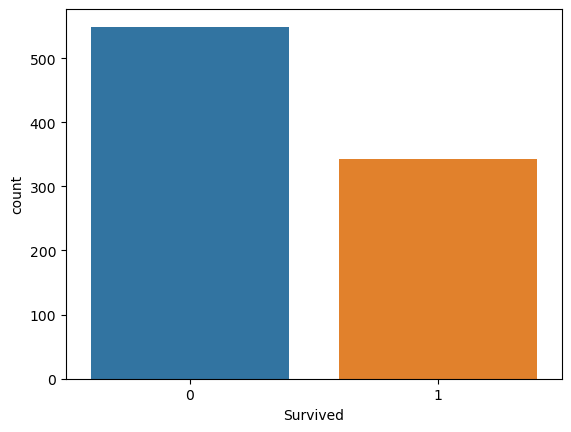

In [17]:
#using a count plot
sns.countplot(x='Survived', data = titanic_analysis)

In [18]:
#this exact numbers
titanic_analysis['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

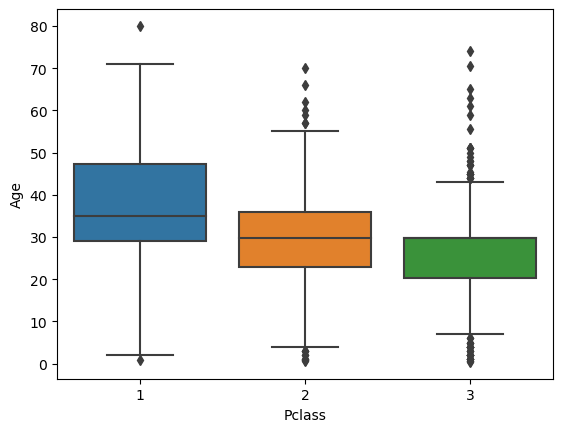

In [26]:
#Did the passenger's age have any impact on what class they travelled in?
sns.boxplot(data = titanic_analysis, x = 'Pclass', y = 'Age')

In [27]:
#Did the class have a correlation with the ticket fare?
#Did passengers with higher ticket fares sit in different cabins from those wo paid lower fares?
#Did ticket fare have any impact on passenger survival?

<Axes: ylabel='Fare'>

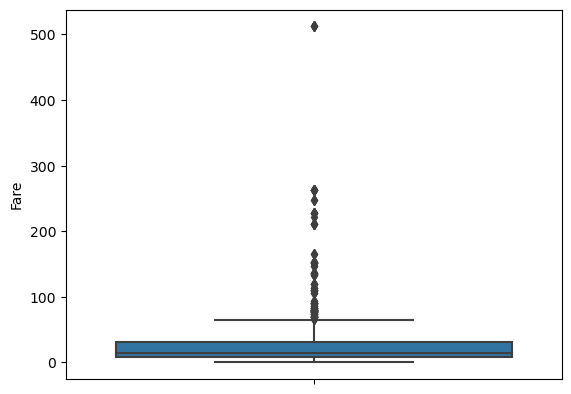

In [36]:
sns.boxplot(data = titanic_analysis, y= 'Fare')

In [38]:
titanic_analysis['Cabin'].value_counts()

Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64